In [2]:
import numpy as np
from PIL import Image
from pylab import *
from copy import deepcopy
import cv2
import numpy as np
from PIL import Image
from pylab import *
%matplotlib inline
from PIL import Image
import numpy as num, math
import numpy as np 
from math import pi, sqrt, exp
from copy import deepcopy
import matplotlib.pyplot as plt
from numpy import matrix
import matplotlib.cm as cm




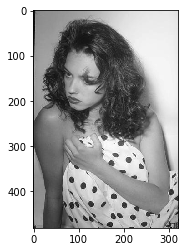

In [3]:
I1 = np.array(Image.open('/home/srikar/CVV/e1.jpg'))
imshow(I1,cmap = cm.gray)

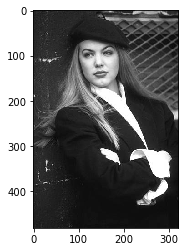

In [4]:
I2 = np.array(Image.open('/home/srikar/CVV/e2.jpg'))
imshow(I2,cmap = cm.gray)

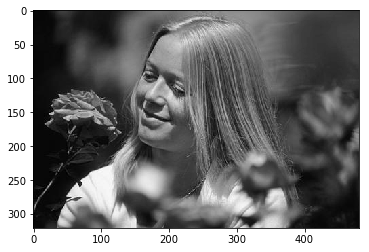

In [5]:
I3 = np.array(Image.open('/home/srikar/CVV/e3.jpg'))
imshow(I3,cmap = cm.gray)

In [6]:
S = np.shape(I2)
S

(481, 321)

In [7]:
S[0]

481

In [8]:
H = np.zeros(256)
intensity = 0

for i in range(S[0]):
    for j in range(S[1]):
        intensity = I2[i,j]
        H[intensity] = H[intensity]+1

M = np.zeros(256)
for intensity in range(256):
    M[intensity] = H[intensity]/154401
    

    


In [9]:
threshold = -1
maximum_entropy	  = 0

for i in range(0, 255):
    sum_p = 0
    prob_bg = [] #background probability.
    prob_fg = [] #foreground probability.
    for j in range(0, i+1):
        sum_p = sum_p + M[j]
        

    T1 = 0 #calculating the background probability.
    for x in range(0, i+1):
        if(sum_p == 0):
            T1 = 0
        else:
            T1 = M[x]/sum_p
            prob_bg.append(T1)

    T2 = 0
    for x in range(i+1, 255):  #calculating the foreground probability.
        if(sum_p == 1):
            T2 = 0
        else:
            T2 = M[x]/(1-sum_p)
            prob_fg.append(T2)
            
    sea = 0 #entropy A
    seb = 0 #entropy B

    for x in range(0, len(prob_bg)):
        if(prob_bg[x]== 0):
            sea = sea + 0
        else:
            sea = sea + prob_bg[x]*np.log(prob_bg[x])
    
    for y in range(0, len(prob_fg)):
        if(prob_fg[y] == 0):
            seb = seb + 0
        else:
            seb = seb + prob_fg[y]*np.log(prob_fg[y])
    if(maximum_entropy < -(sea) - (seb)):
        maximum_entropy = -(sea) -(seb)
        threshold = i
    

In [10]:
print(threshold)

94


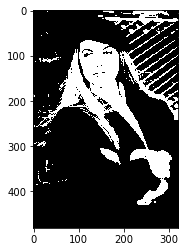

In [11]:
new = np.copy(I1)

for i in range(S[0]):
    for j in range(S[1]):
        if(I2[i,j] > threshold):
            new[i,j] = 1
        else:
            new[i,j] = 0
            
plt.figure()
plt.imshow(new, cmap = cm.gray)
plt.show()

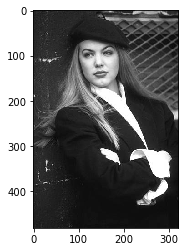

In [13]:
plt.figure()
plt.imshow(I2, cmap = cm.gray)
plt.show()